<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/12_Logistic_Regression_Model_for_Predicting_the_Survival_Chances_of_Titanic_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Logistic Regression Model for Predicting the Survival Chances of Titanic Passengers.</b></div>

#  *1.Import Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#

# *2.Import datasets*

- Definition of columns in dataset



| Variable  | Definition                              | Key                                      |
|-----------|-----------------------------------------|------------------------------------------|
| survival  | Survival                                | 0 = No, 1 = Yes                          |
| pclass    | Ticket class                            | 1 = 1st, 2 = 2nd, 3 = 3rd               |
| sex       | Sex                                     |                                          |
| Age       | Age in years                            |                                          |
| sibsp     | # of siblings / spouses aboard the Titanic |                                          |
| parch     | # of parents / children aboard the Titanic |                                          |
| ticket    | Ticket number                           |                                          |
| fare      | Passenger fare                          |                                          |
| cabin     | Cabin number                            |                                          |
| embarked  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |


In [ ]:
titan_df=pd.read_csv('/Users/maegbug/Downloads/titanic/train.csv')
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#

# *3.Data Analysis and visualization*

In [ ]:
titan_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titan_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titan_df=titan_df.drop(columns='Cabin')

In [ ]:
# replace missing values
titan_df['Age'].fillna(titan_df['Age'].mean(), inplace=True)
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# replace textual values
print(titan_df['Embarked'].mode())
# S is mode

0    S
Name: Embarked, dtype: object


In [ ]:
titan_df['Embarked'].fillna(titan_df['Embarked'].mode()[0], inplace=True)
titan_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#how many people survived and didnt survived
titan_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

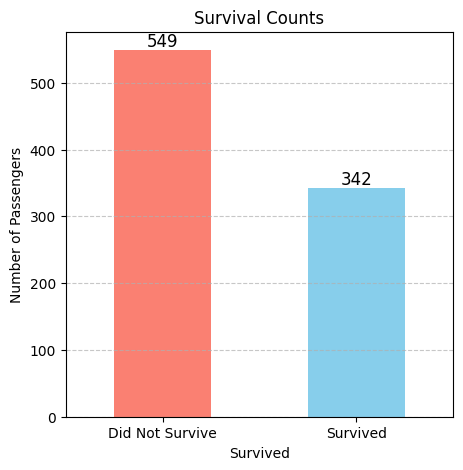

In [ ]:
plt.figure(figsize=(5, 5))
c=titan_df['Survived'].value_counts().plot(kind='bar', color=[ 'salmon','skyblue'])
for i in c.patches:
    c.text(i.get_x() + i.get_width()/2, i.get_height() + 0.1, int(i.get_height()),
            ha='center', va='bottom', fontsize=12, color='black')
c.set_title('Survival Counts')
c.set_xlabel('Survived')
c.set_ylabel('Number of Passengers')
c.set_xticklabels(['Did Not Survive', 'Survived'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

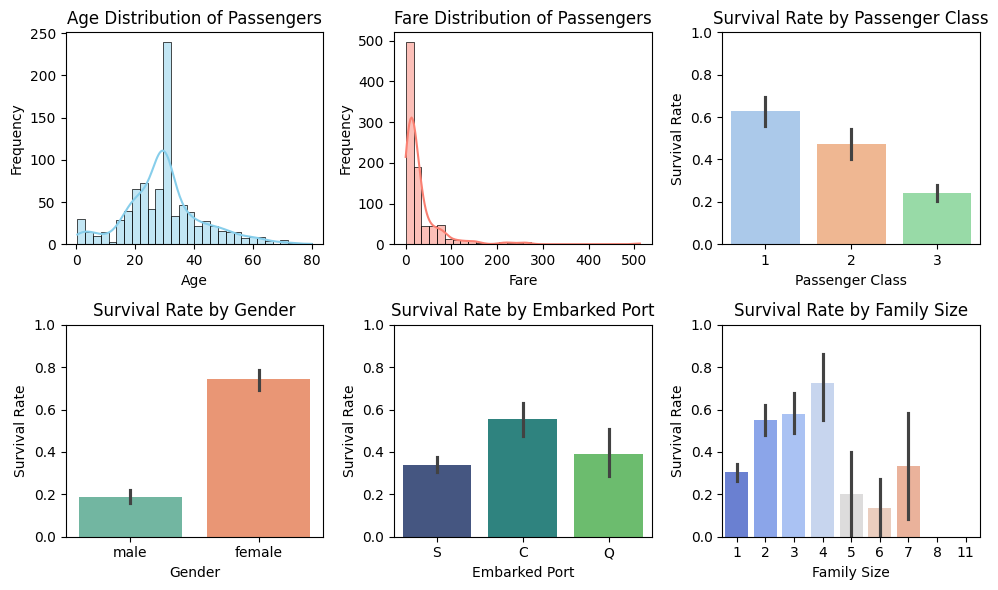

In [ ]:
import warnings
warnings.simplefilter('ignore')
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
sns.histplot(titan_df['Age'].dropna(), bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of Passengers')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')


sns.histplot(titan_df['Fare'], bins=30, kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution of Passengers')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Frequency')


sns.barplot(x='Pclass', y='Survived', data=titan_df, palette='pastel', ax=axes[0, 2])
axes[0, 2].set_title('Survival Rate by Passenger Class')
axes[0, 2].set_xlabel('Passenger Class')
axes[0, 2].set_ylabel('Survival Rate')
axes[0, 2].set_ylim(0, 1)


sns.barplot(x='Sex', y='Survived', data=titan_df, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Survival Rate')
axes[1, 0].set_ylim(0, 1)


sns.barplot(x='Embarked', y='Survived', data=titan_df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Embarked Port')
axes[1, 1].set_xlabel('Embarked Port')
axes[1, 1].set_ylabel('Survival Rate')
axes[1, 1].set_ylim(0, 1)

titan_df['FamilySize'] = titan_df['SibSp'] + titan_df['Parch'] + 1


sns.barplot(x='FamilySize', y='Survived', data=titan_df, palette='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title('Survival Rate by Family Size')
axes[1, 2].set_xlabel('Family Size')
axes[1, 2].set_ylabel('Survival Rate')
axes[1, 2].set_ylim(0, 1)
plt.tight_layout()
plt.show()


#

# *4. Data normalization and preparing*

In [ ]:
# encoding categorical columns
titan_df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [ ]:
X=titan_df.drop(columns=['PassengerId','Ticket', 'Survived','Name'], axis=1)
Y=titan_df['Survived']

In [ ]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0,22.0,1,0,7.2500,0,2
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1


In [ ]:
Y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(712, 8) (179, 8) (712,) (179,)


#

# *5.Model Training*

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

#

# *6.Evalution*

In [ ]:
# for train data
Y_pred_train=model.predict(X_train)
Y_pred_train

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
Accuracy=accuracy_score(Y_train,Y_pred_train)
print('Accuracy for train data is ',Accuracy)

Accuracy for train data is  0.8089887640449438


In [ ]:
# for test data
Y_pred_test=model.predict(X_test)
Y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [ ]:
Accuracy_1=accuracy_score(Y_test,Y_pred_test)
print('Accuracy for test data is ',Accuracy_1)

Accuracy for test data is  0.7821229050279329


Text(0.5, 1.0, 'Confusion Matrix')

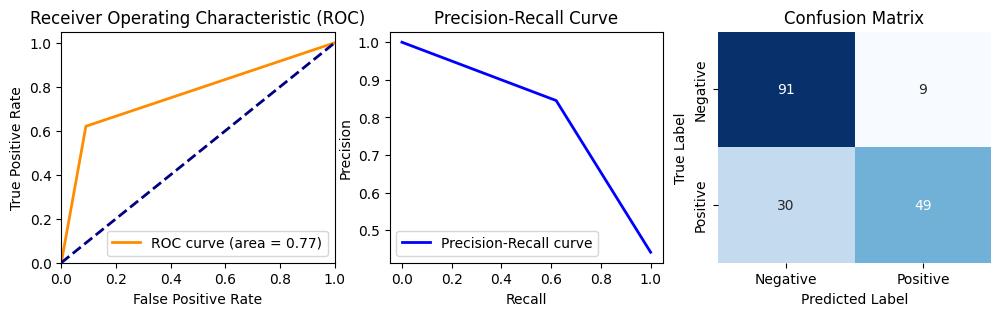

In [ ]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix


fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# **ROC Curve**
fpr, tpr, _ = roc_curve(Y_test, Y_pred_test)
roc_auc = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC)')
axes[0].legend(loc='lower right')

# **Precision-Recall Curve**
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_test)

axes[1].plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc='best')

# **Confusion Matrix**
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            ax=axes[2])
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')
axes[2].set_title('Confusion Matrix')




In [ ]:
# Precision recall curve is good(not best)
#